<a href="https://colab.research.google.com/github/guimaraess2/Estatistica-em-linguagem-R/blob/main/Teste_hipotese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importando as bibliotecas**

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt


**Carregando o dataset**

In [5]:
df = pd.read_csv("/content/sample_data/Churn_Modelling.csv")

**Visualizar algumas linhas**

In [10]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7051,7052,15596797,Barnet,643,Spain,Male,43,1,0.00,2,1,1,145764.40,0
8935,8936,15585066,Chimaraoke,660,France,Female,43,1,0.00,1,0,1,112026.10,1
9989,9990,15605622,McMillan,841,Spain,Male,28,4,0.00,2,1,1,179436.60,0
7607,7608,15638751,Ashton,838,Spain,Female,41,5,0.00,2,1,0,81313.51,0
134,135,15712543,Chinweike,789,Germany,Male,39,7,124828.46,2,1,1,124411.08,0
2782,2783,15775234,Laurie,646,France,Male,24,8,0.00,2,0,0,92612.88,0
5088,5089,15734610,Onio,543,France,Male,42,4,89838.71,3,1,0,85983.54,1
3056,3057,15762605,Wall,685,France,Male,58,1,104796.54,1,1,1,154181.41,0
8130,8131,15588928,Maslow,704,France,Male,47,5,0.00,2,1,1,145338.61,0
9871,9872,15736371,Kennedy,633,France,Female,34,3,123034.43,2,1,1,38315.04,0


**Resumo estatístico**

In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**hipótese nula H0** - Não há diferença de salário estimado entre homens e mulheres

**hiótese alternativa H1** - Há diferença de salário estimado entre homens e mulheres

**Utilizando o teste de Levene para verificar a homocedasticidade** 

**hipótese nula H0** - A variância entre os grupos é igual

**hiótese alternativa H1** - A variância entre os grupos não é igual

In [13]:
scipy.stats.levene(df[df['Gender'] == 'Female'] ['EstimatedSalary'],
                   df[df['Gender'] == 'Male'] ['EstimatedSalary'], center='mean')
#Como o valor-p é maior que o nível de significância alpha=0.05, não rejeitamos a hipótese nula, ou seja, a variância entre os grupos é igual

LeveneResult(statistic=0.5138439988784491, pvalue=0.473496281028016)

**Visualização dos dados**

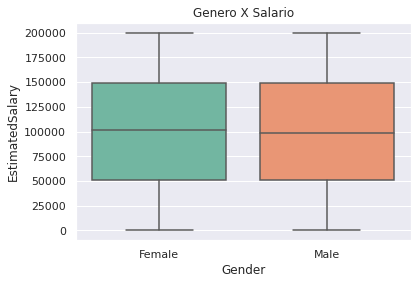

In [20]:
plt.title('Genero X Salario')
sns.set(style="darkgrid")
sns.boxplot(x = 'Gender', y = 'EstimatedSalary', data = df,  palette="Set2")
plt.show()

**Utilizando a análise de variância ANOVA em grupos de idades, para saber se difere do saldo.**

In [62]:
#Criando um intervalo de grupos para fazer a análise
df.loc[(df['Age'] <= 30), 'new_age'] = 'menores que 30 anos'
df.loc[(df['Age'] > 30) &  (df['Age'] < 80), 'new_age'] = 'entre 30 e 80 anos'
df.loc[(df['Age'] >= 80), 'new_age'] = 'maiores que 80 anos'

**hipótese nula H0** - Nenhum grupo de idade difere pelo valor do saldo

**hiótese alternativa H1** - Pelo menos 1 grupo de idade difere pelo valor do saldo. 

In [63]:
#Separando as amostras
grupo_1 =  df[df['new_age'] == 'menores que 30 anos']['Balance']
grupo_2 =  df[df['new_age'] == 'entre 30 e 80 anos']['Balance']
grupo_3 =  df[df['new_age'] == 'maiores que 80 anos']['Balance']
                  

**Aplicando ANOVA de uma via**

In [64]:
Anova = scipy.stats.f_oneway(grupo_1, grupo_2, grupo_3)
Anova
#Como o valor-p é menor que o nível de significância alpha=0.05, rejeitamos a hipótese nula, pois há evidências que pelo menos um grupo de idades difere pelo valor do saldo.

F_onewayResult(statistic=5.433028234221274, pvalue=0.004382755220115327)

**Visualização dos dados**

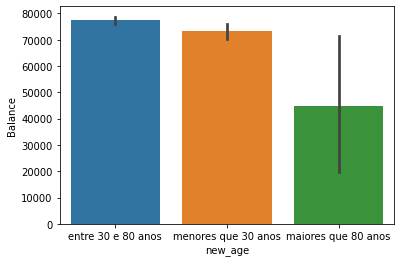

In [71]:
sns.barplot(x = 'new_age',
            y = 'Balance',
            data = df)
plt.show()